# Post Collection Analysis of Sensor and Image Data

In [1]:
# import librosa
import sys
import os
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE


In [8]:
IMAGE_SENSOR_NAMES = ["EYE_Log.mp4", "RGB_Log.mp4", "LSLAM_Log.mp4", "RSLMA_Log.mp4"]
DIRECTORIES = ["angry", "happy"]#, "kiss"]

In [3]:
subject_name = input("Please input the subject name: ")
date = input("Please insert the date: ")
if subject_name == "niccolo":
  prefix = date
else:
  prefix = f"{subject_name}_{date}"

print(subject_name)
print(prefix)

niccolo
02_04


In [9]:
SENSOR_LOGS = dict()

# Get the current directory
current_directory = os.path.join(os.getcwd(), "data_collection/", subject_name)

# Loop through subdirectories and files
for directory in DIRECTORIES:
    for modality in [""]:#, "_vocal"]:
        for i in ["", "_2", "_3"]:
            temp_logs = dict()
            current_sample = f"{directory}{modality}{i}"
            print(f"{current_directory}/{prefix}_{current_sample}")
            for root, dirs, files in os.walk(f"{current_directory}/{prefix}_{current_sample}/"):
                for file in files:
                    if file not in IMAGE_SENSOR_NAMES:
                        file_path = os.path.join(current_directory, f"{prefix}_{current_sample}", file)
                        try:
                            temp_logs[file.split(".")[0]] = np.genfromtxt(file_path, delimiter=",")
                        except Exception as e:
                            print(f"Could not read {file_path}: {e}")
            SENSOR_LOGS[current_sample] = temp_logs

/Users/niccolonobili/code/Pitt/research/data_collection/niccolo/02_04_angry
/Users/niccolonobili/code/Pitt/research/data_collection/niccolo/02_04_angry_2
/Users/niccolonobili/code/Pitt/research/data_collection/niccolo/02_04_angry_3
/Users/niccolonobili/code/Pitt/research/data_collection/niccolo/02_04_happy
/Users/niccolonobili/code/Pitt/research/data_collection/niccolo/02_04_happy_2
/Users/niccolonobili/code/Pitt/research/data_collection/niccolo/02_04_happy_3


In [10]:
print("Sensor log keys are:")
for name in SENSOR_LOGS.keys():
  print(f"- {name}")

Sensor log keys are:
- angry
- angry_2
- angry_3
- happy
- happy_2
- happy_3


# t-SNE plot

In [11]:
print(SENSOR_LOGS['angry'].keys())

dict_keys(['Magno_Log', 'IMU2_ACC_Log', 'Baro_Log', 'IMU1_GYRO_Log', 'IMU1_ACC_Log', 'IMU2_GYRO_Log', 'Audio_Log'])


(845, 4)

In [23]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)

angry = SENSOR_LOGS['angry']['IMU1_GYRO_Log']
# angry = angry[:, 1:]
print(angry.shape)
# angry_2 = SENSOR_LOGS['angry_2']['IMU2_ACC_Log']
# # angry2 = angry_2[:, 1:]
# print(angry_2.shape)

happy = SENSOR_LOGS['happy']['IMU1_GYRO_Log']
# happy = happy[:, 1:]
print(happy.shape)
# happy_2 = SENSOR_LOGS['happy_2']['IMU2_GYRO_Log']
# # happy_2 = happy[:, 1:]
# print(happy_2.shape)

# kiss = SENSOR_LOGS['kiss']['IMU1_GYRO_Log']
# # happy = happy[:, 1:]
# print(happy.shape)
# kiss_2 = SENSOR_LOGS['kiss_2']['IMU2_GYRO_Log']
# # happy_2 = happy[:, 1:]
# print(kiss_2.shape)

(1762, 4)
(2096, 4)


In [ ]:
# plt.plot(angry[:, 0], angry[:, 1])
# plt.plot(angry[:, 0], angry[:, 2])
plt.plot(angry[:, 0], angry[:, 3])
plt.show()

# plt.plot(happy[:, 0], happy[:, 1])
plt.plot(happy[:, 0], happy[:, 2])
# plt.plot(happy[:, 0], happy[:, 3])
plt.show()

# plt.plot(happy_2[:, 0], happy_2[:, 1])
plt.plot(happy_2[:, 0], happy_2[:, 2])
# plt.plot(happy_2[:, 0], happy_2[:, 3])
plt.show()

# plt.plot(happy_2[:, 0], happy_2[:, 1])
plt.plot(kiss_2[:, 0], kiss_2[:, 2])
# plt.plot(happy_2[:, 0], happy_2[:, 3])
plt.show()

# Meeting Notes

- manually segment data with only relevant facial expression data points
- assign labels to each segment
- stack different (x, y) combos for different emotions
- 

In [61]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])
print(X.shape)
print(y.shape)

(1797, 64)
(1797, 64)
(1797,)


# Manual Segmentation

In [16]:
for name in SENSOR_LOGS.keys(): print(name)

angry
angry_2
angry_3
happy
happy_2
happy_3


In [8]:
for name in SENSOR_LOGS['angry'].keys(): print(name)

Magno_Log
IMU2_ACC_Log
Baro_Log
IMU1_GYRO_Log
IMU1_ACC_Log
IMU2_GYRO_Log
Audio_Log


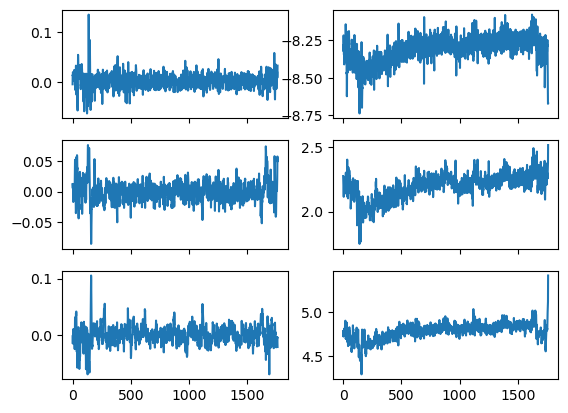

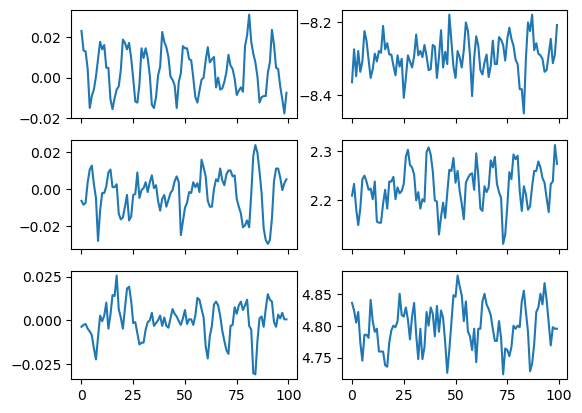

In [13]:
gyro_data = SENSOR_LOGS['angry']['IMU1_GYRO_Log'].copy()
acc_data = SENSOR_LOGS['angry']['IMU1_ACC_Log'].copy()

fig, axes = plt.subplots(3, 2, sharex=True)
# channels vertical
# left gyro, right acc

for i in range(3):
  # axes[i, 0].plot(gyro_data[:, 0], gyro_data[:, i + 1])
  # axes[i, 1].plot(acc_data[:, 0], acc_data[:, i + 1])
  axes[i, 0].plot(gyro_data[:, i + 1])
  axes[i, 1].plot(acc_data[:, i + 1])
plt.show()

fig, axes = plt.subplots(3, 2, sharex=True)
for i in range(3):
  axes[i, 0].plot(gyro_data[700:800, i + 1])
  axes[i, 1].plot(acc_data[700:800, i + 1])
plt.show()

# fig, axes = plt.subplots(3, 2, sharex=True)
# channels vertical
# left gyro, right acc

# for i in range(3):
#   axes[i, 0].plot(gyro_data[len(gyro_data) // 2:, 0], gyro_data[len(gyro_data) // 2:, i + 1])
#   axes[i, 1].plot(acc_data[len(acc_data) // 2:, 0], acc_data[len(acc_data) // 2:, i + 1])
# plt.show()

# for i in range(3):
#   axes[i, 0].plot(gyro_data[:, i + 1])
#   axes[i, 1].plot(acc_data[:, i + 1])
# plt.show()

# for i in range(3):
#   axes[i, 0].plot(gyro_data[:, i + 1])
#   axes[i, 1].plot(acc_data[:, i + 1])
# plt.show()

# fig, axes = plt.subplots(3, 2, sharex=True)
# for i in range(3):
#   axes[i, 0].plot(gyro_data[600:700, i + 1])
#   axes[i, 1].plot(acc_data[600:700, i + 1])
# plt.show()

# Meeting Notes 21 Jan

- verify IMU data makes sense --> x, y, z movements are plausible
- add head locking to data collection protocol
- 

In [ ]:
# Segmenting the signal
# testing for 50 points per segment
INTERVAL = 50

unique = [i for i in x if x.count(i) == 1 ]
#
segmented_gyro_data = [gyro_data[]]

# STFT

49.94749373976469


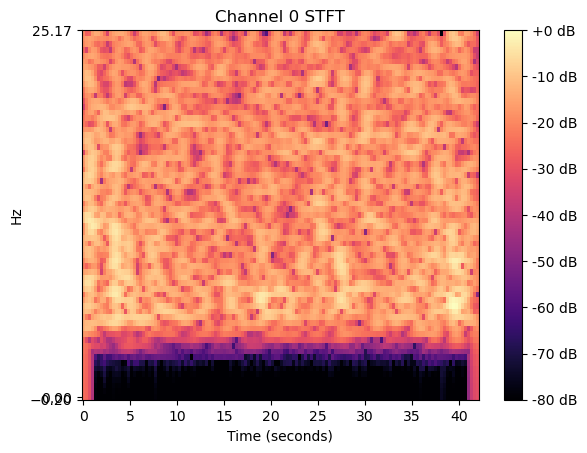

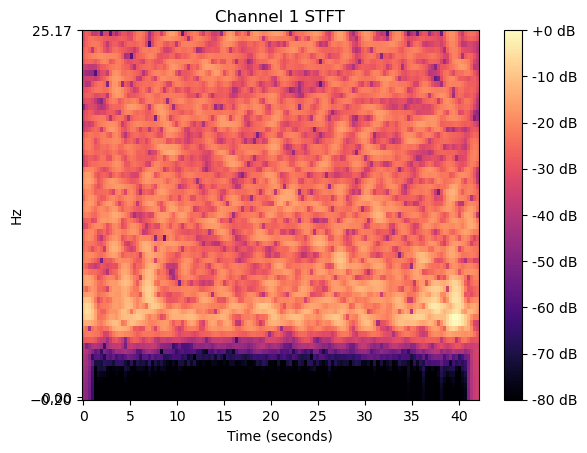

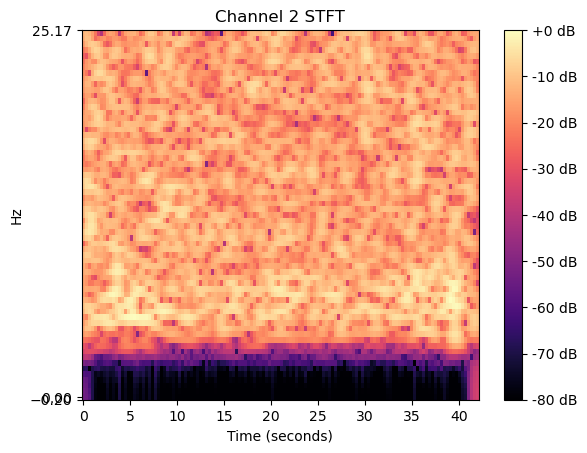

In [29]:
import scipy.signal as signal
import librosa

# SAMPLE_RATE = 1000
NFFT = 128

gyro_data = SENSOR_LOGS['happy']['IMU1_GYRO_Log'].copy()
acc_data = SENSOR_LOGS['happy']['IMU1_ACC_Log'].copy()
SAMPLE_RATE = len(gyro_data) / ((gyro_data[-1][0] - gyro_data[0][0]) / 1e9)
print(SAMPLE_RATE)
# print(f"sample rate = {len(gyro_data) / ((gyro_data[-1][0] - gyro_data[0][0]) / 1e9)}")
# print(f"sample rate = {len(acc_data) / ((gyro_data[-1][0] - gyro_data[0][0]) / 1e9)}")

def highpass_filter(data, cutoff, order=5):
    b, a = signal.butter(order, cutoff, fs=SAMPLE_RATE, btype='highpass', analog=False)
    y = signal.filtfilt(b, a, data)
    return y

def lowpass_filter(data, cutoff, order=5):
    b, a = signal.butter(order, cutoff, fs=SAMPLE_RATE, btype='lowpass', analog=False)
    y = signal.filtfilt(b, a, data)
    return y

for i in range(1, 4):
#     # acc_data[:, i] = lowpass_filter(acc_data[:, i], 0.1)
    acc_data[:, i] = highpass_filter(acc_data[:, i], 5)
#     # ratio = 2 / (np.max(acc_data[:, i]) - np.min(acc_data[:, i])) 
#     # shift = (np.max(acc_data[:, i]) + np.min(acc_data[:, i])) / 2 
#     # acc_data[:, i] = (acc_data[:, i] - shift) * ratio

    # acc_data[:, i] = acc_data[:, i] / np.max(np.abs(acc_data[:, i]))

# plt.plot(acc_data[:,1])
# plt.plot(acc_data[:,2])
# plt.plot(acc_data[:,3])
# plt.show()

stft_signals = []
for i in range(1, 4):
    # plt.plot(acc_data[:, i])
    # plt.show()
    stft_signals.append(librosa.stft(acc_data[:, i], n_fft=NFFT, hop_length=NFFT // 8))

for idx, result in enumerate(stft_signals):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(
                                np.abs(result),ref=np.max),
                                y_axis='log', x_axis='s', ax=ax, sr=SAMPLE_RATE,
                                n_fft=NFFT, hop_length=NFFT/8)
    ax.set_title(f"Channel {idx} STFT")
    fig.colorbar(img, ax=ax, format="%+2.0f dB")
    plt.show()

# Old analysis

IndexError: index 3 is out of bounds for axis 0 with size 3

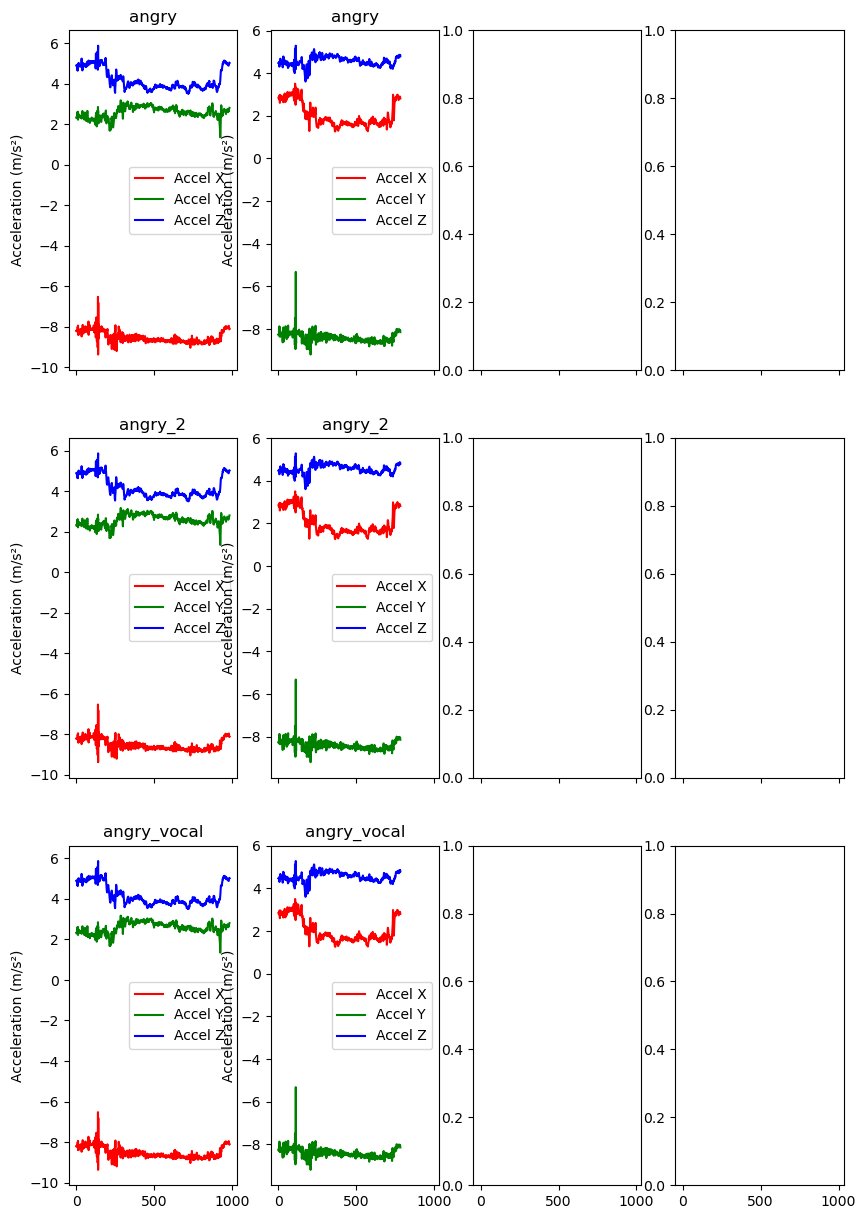

In [32]:
fig, axes = plt.subplots(len(DIRECTORIES), 4, figsize=(10, 15), sharex=True)

for idx, (foldername, folder) in enumerate(SENSOR_LOGS.items()):
  imu_data1 = folder["IMU1_ACC_Log"]
  imu_data2 = folder["IMU2_ACC_Log"]
  # time = imu_data[:, 0]
  time1 = np.arange(imu_data1.shape[0])
  accel_x = imu_data1[:, 1]
  accel_y = imu_data1[:, 2]
  accel_z = imu_data1[:, 3]
  axes[idx, 0].plot(time1, accel_x, label='Accel X', color='r')
  axes[idx, 0].plot(time1, accel_y, label='Accel Y', color='g')
  axes[idx, 0].plot(time1, accel_z, label='Accel Z', color='b')
  axes[idx, 0].set_ylabel('Acceleration (m/s²)')
  axes[idx, 0].set_title(foldername)
  axes[idx, 0].legend()

  time2 = np.arange(imu_data2.shape[0])
  accel_x = imu_data2[:, 1]
  accel_y = imu_data2[:, 2]
  accel_z = imu_data2[:, 3]
  axes[idx, 1].plot(time2, accel_x, label='Accel X', color='r')
  axes[idx, 1].plot(time2, accel_y, label='Accel Y', color='g')
  axes[idx, 1].plot(time2, accel_z, label='Accel Z', color='b')
  axes[idx, 1].set_ylabel('Acceleration (m/s²)')
  axes[idx, 1].set_title(foldername)
  axes[idx, 1].legend()

# plt.xlabel('Time (s)')
plt.xlabel("Sample #")
plt.tight_layout()
plt.show()

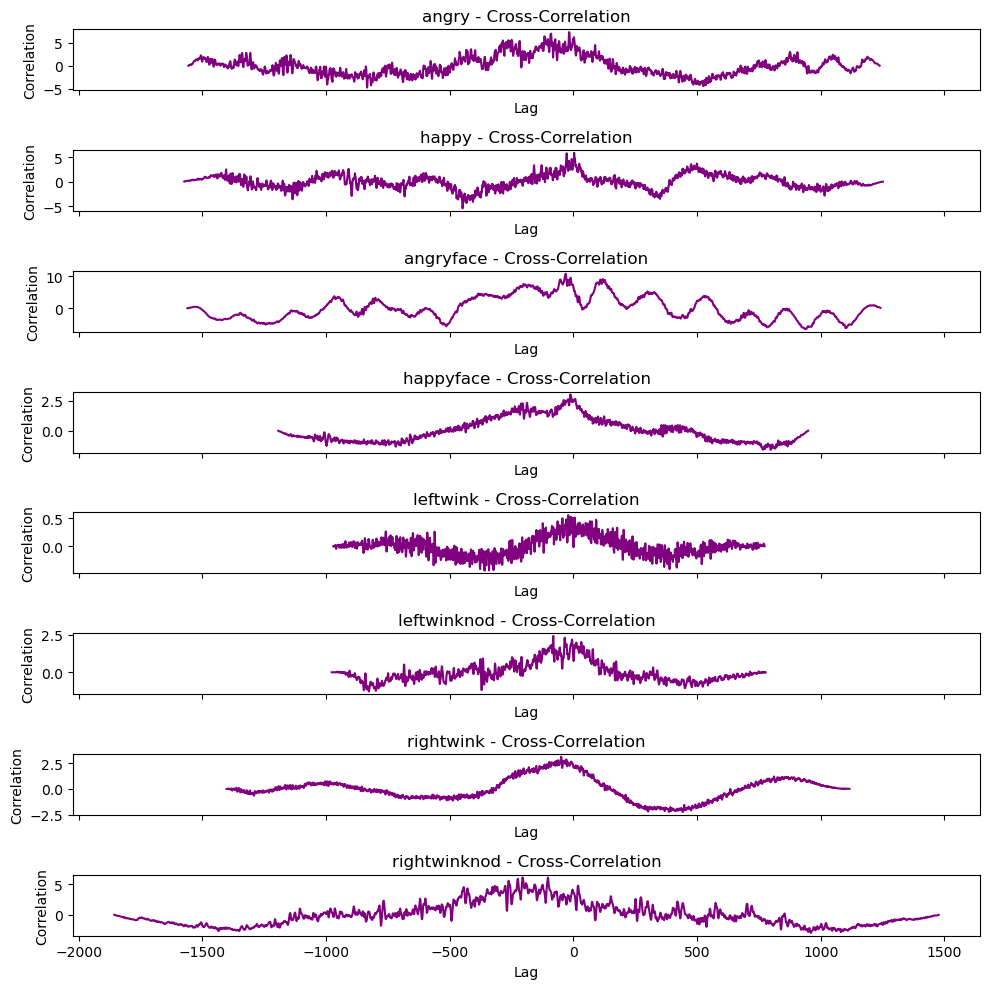

In [54]:
fig, axes = plt.subplots(len(DIRECTORIES), 1, figsize=(10, 10), sharex=True)

for i, (foldername, folder) in enumerate(SENSOR_LOGS.items()):
  imu_data1 = folder["IMU1_ACC_Log"]
  imu_data2 = folder["IMU2_ACC_Log"]
  
  accel_x1 = imu_data1[:, 1]
  accel_x2 = imu_data2[:, 1]

  accel_x1 = accel_x1 - np.mean(accel_x1)
  accel_x2 = accel_x2 - np.mean(accel_x2)

  lags = np.arange(-len(accel_x1) + 1, len(accel_x2))
  cross_corr = np.correlate(accel_x1, accel_x2, mode='full')

  axes[i].plot(lags, cross_corr, label='Cross-Corr (X-axis)', color='purple')
  axes[i].set_title(f"{foldername} - Cross-Correlation")
  axes[i].set_xlabel("Lag")
  axes[i].set_ylabel("Correlation")
  # axes[i].legend()

plt.tight_layout()
plt.show()

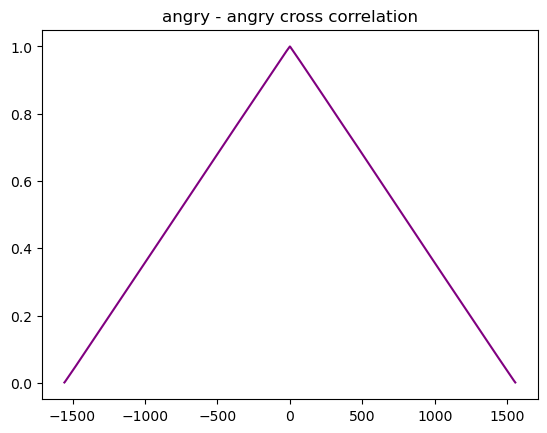

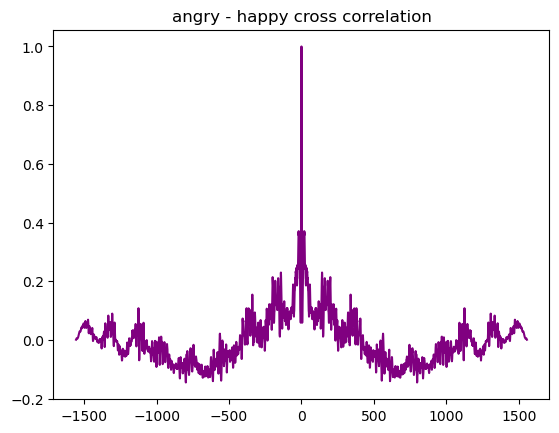

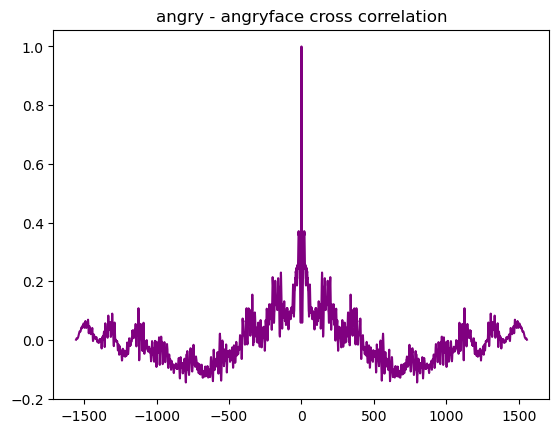

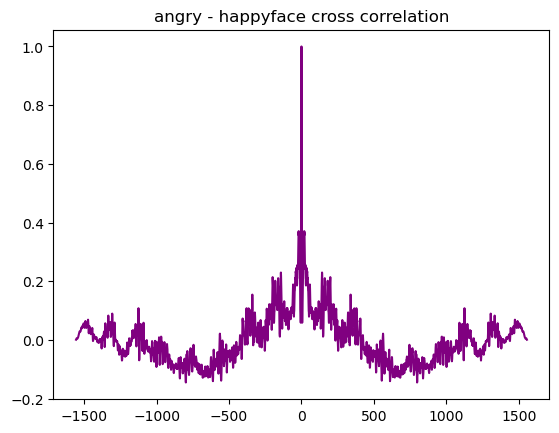

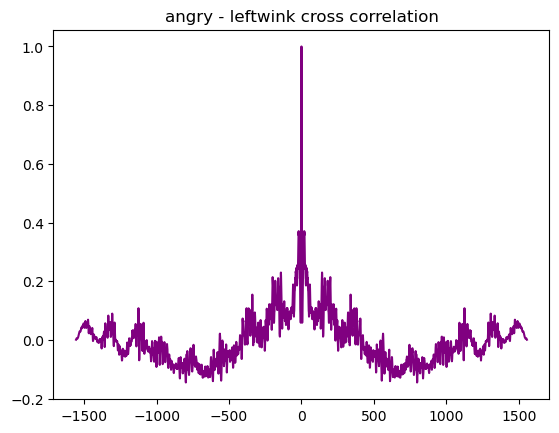

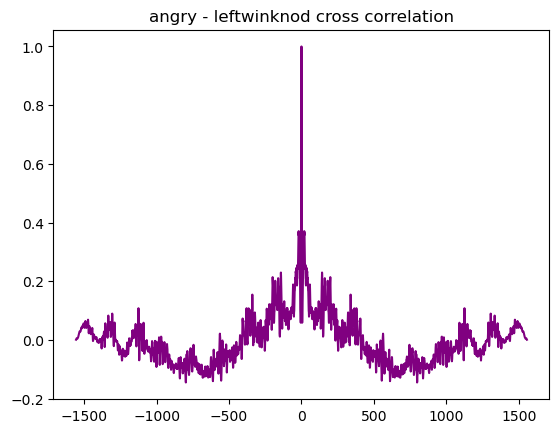

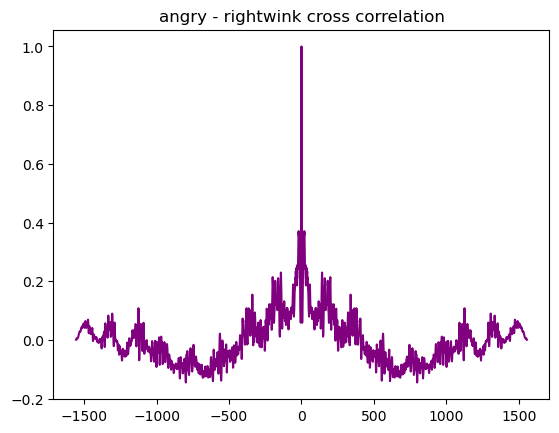

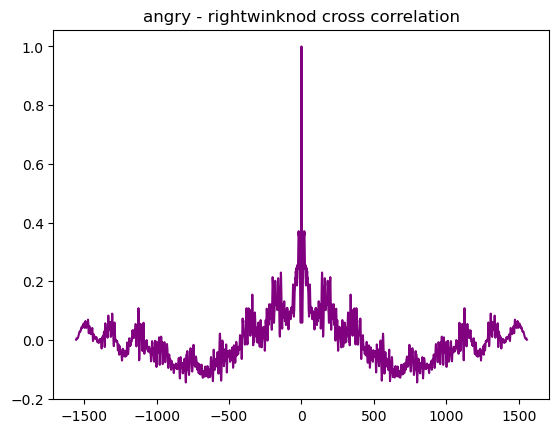

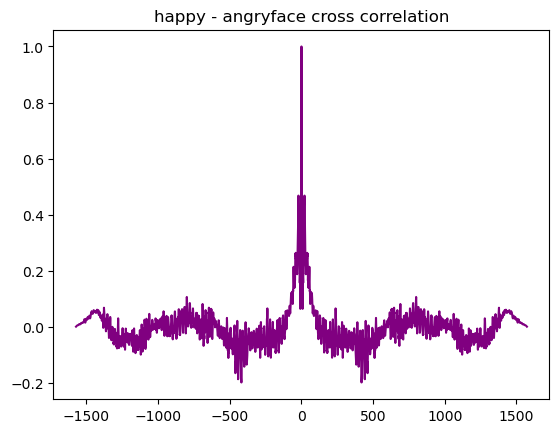

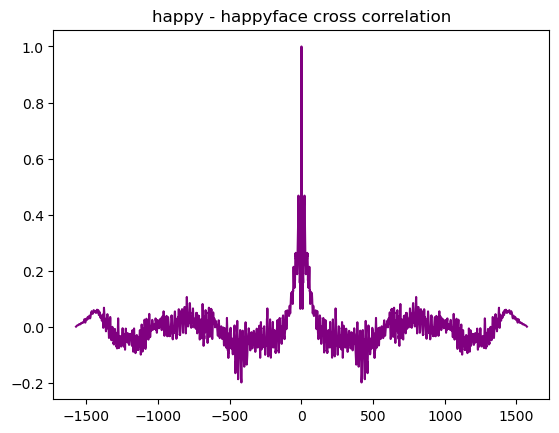

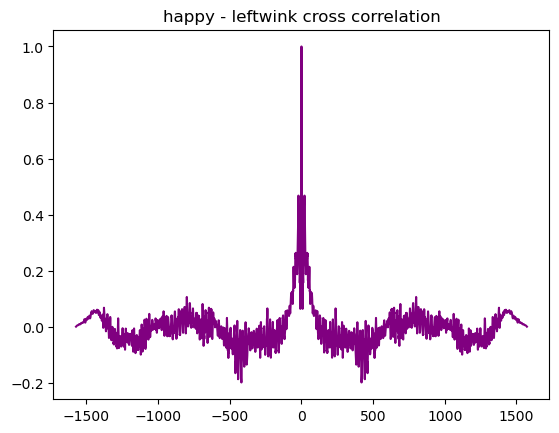

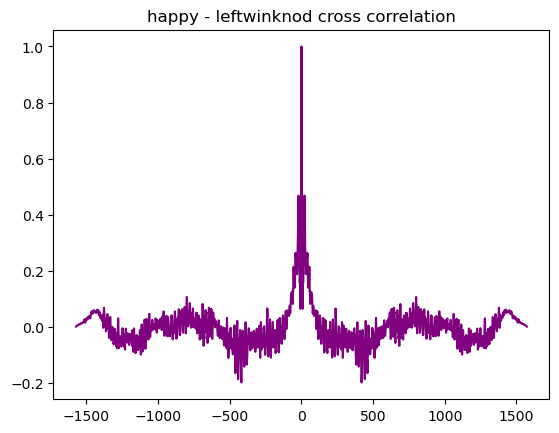

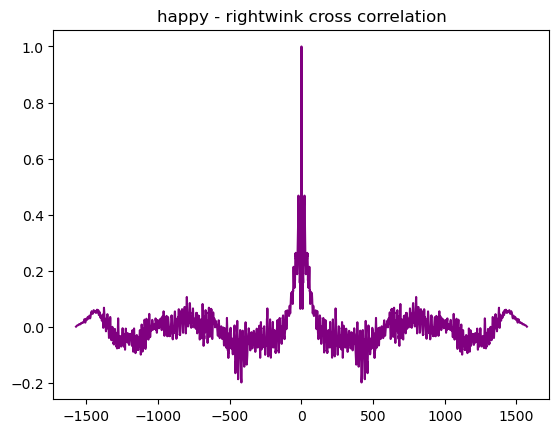

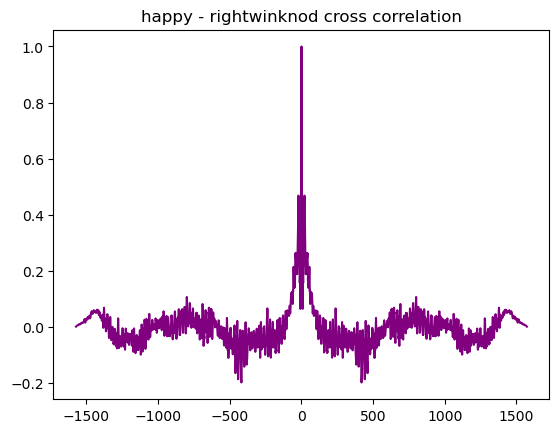

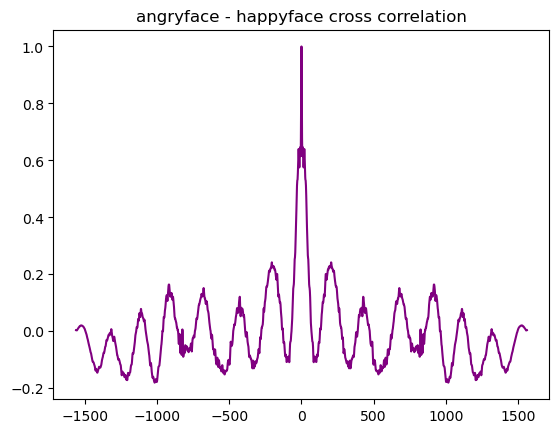

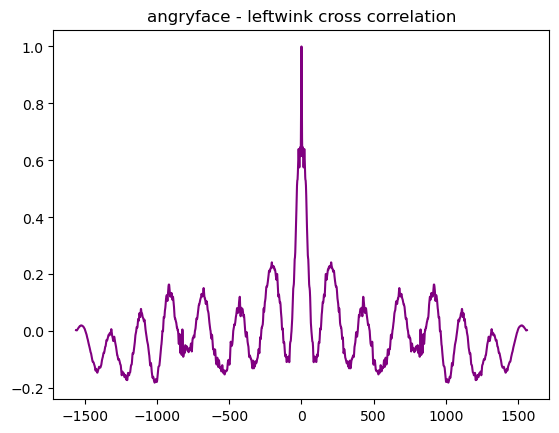

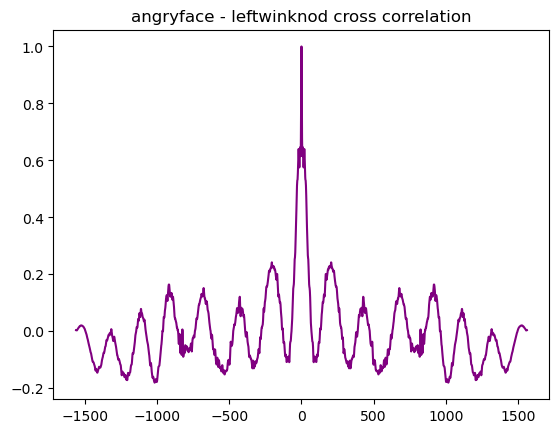

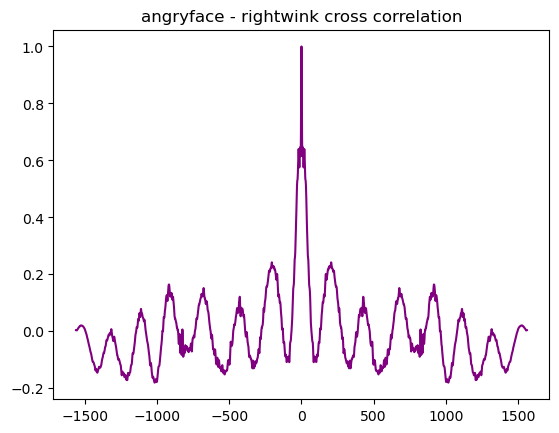

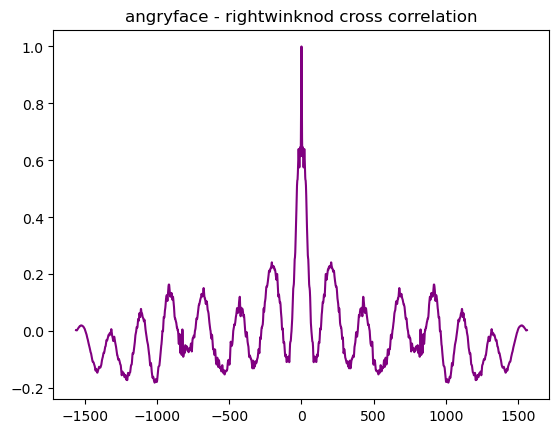

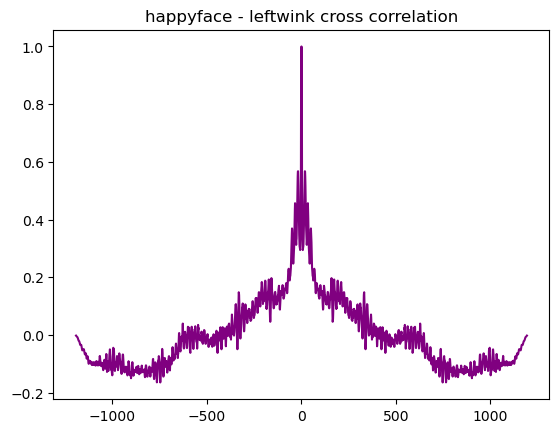

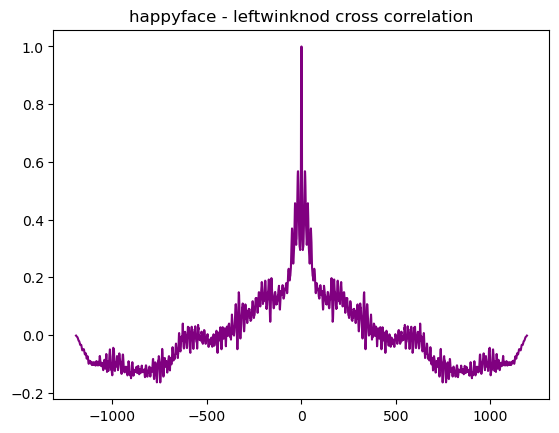

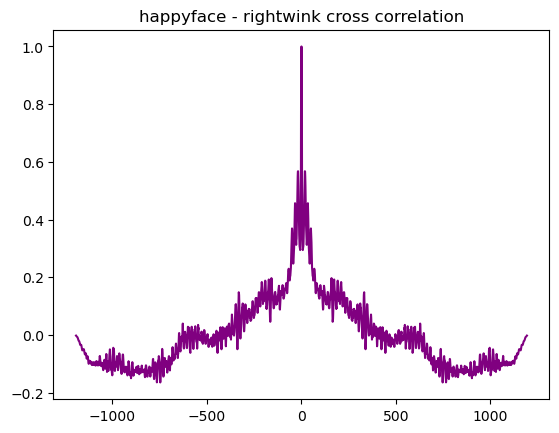

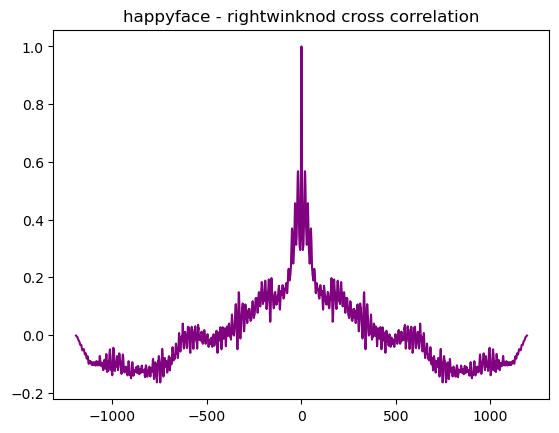

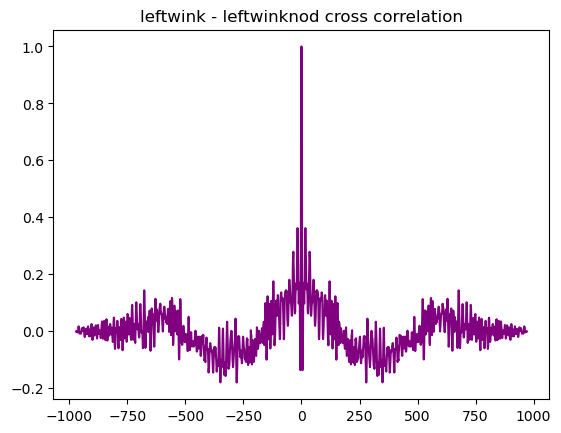

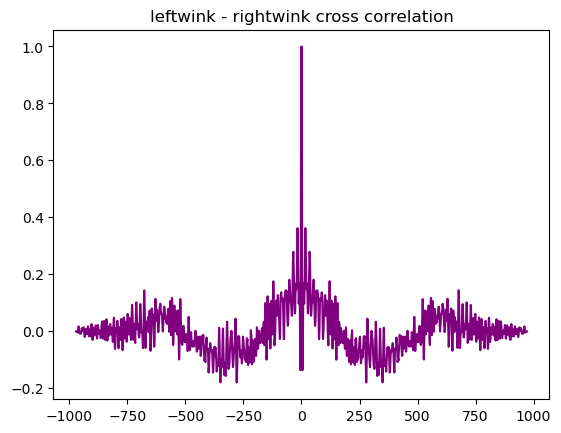

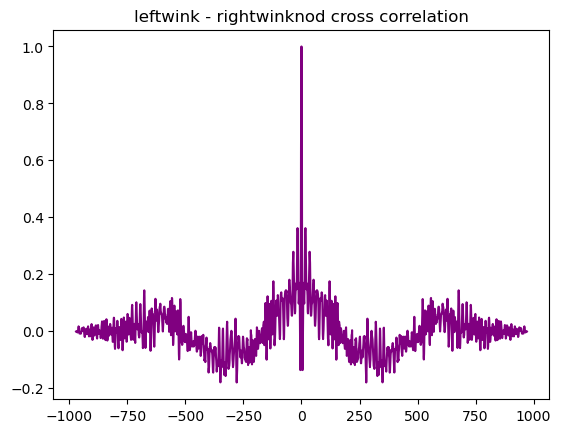

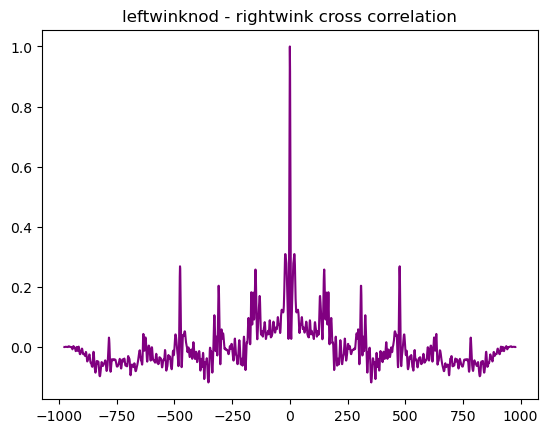

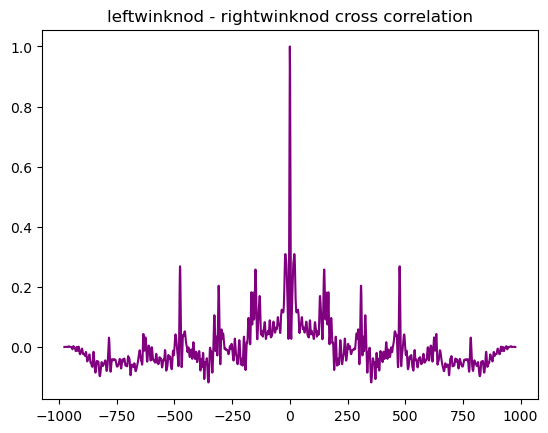

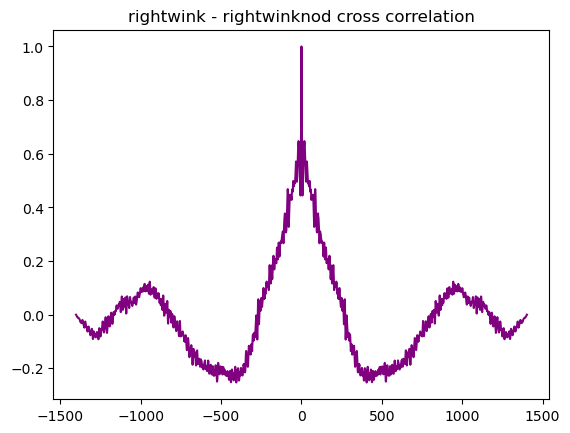

In [63]:
from itertools import combinations
from scipy.ndimage import uniform_filter1d

# Placeholder for IMU1 data extraction
imu1_data_dict = {}  # {foldername: imu1_data[:, 1:4]}  # Assuming 3 columns (X, Y, Z)

# Collect IMU1 data for each folder
for foldername, folder in SENSOR_LOGS.items():
    imu1_data_dict[foldername] = folder["IMU1_ACC_Log"][:, 1:4]  # Extracting X, Y, Z

# List of folder names
folder_names = list(imu1_data_dict.keys())

# Get unique pairs using combinations
unique_pairs = list(combinations(folder_names, 2))

a = imu1_data_dict['angry'][:, 0]
lags = np.arange(-len(a) + 1, len(a))
cross_corr = np.correlate(a, a, mode='full')
cross_corr = uniform_filter1d(cross_corr, size=5)
cross_corr = cross_corr / np.max(np.abs(cross_corr))
plt.plot(lags, cross_corr, label='Cross-Corr (X-axis)', color='purple')
plt.title(f"angry - angry cross correlation")
plt.show()

for pair in unique_pairs:
    imu_data1 = imu1_data_dict[pair[0]]
    imu_data2 = imu1_data_dict[pair[0]]

    accel_x1 = imu_data1[:, 0]
    accel_x2 = imu_data2[:, 0]

    accel_x1 = accel_x1 - np.mean(accel_x1)
    accel_x2 = accel_x2 - np.mean(accel_x2)

    min_len = min(len(accel_x1), len(accel_x2))
    accel_x1 = accel_x1[:min_len]
    accel_x2 = accel_x2[:min_len]

    lags = np.arange(-len(accel_x1) + 1, len(accel_x2))
    cross_corr = np.correlate(accel_x1, accel_x2, mode='full')
    cross_corr = uniform_filter1d(cross_corr, size=5)
    cross_corr = cross_corr / np.max(np.abs(cross_corr))
    plt.plot(lags, cross_corr, label='Cross-Corr (X-axis)', color='purple')
    plt.title(f"{pair[0]} - {pair[1]} cross correlation")
    plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

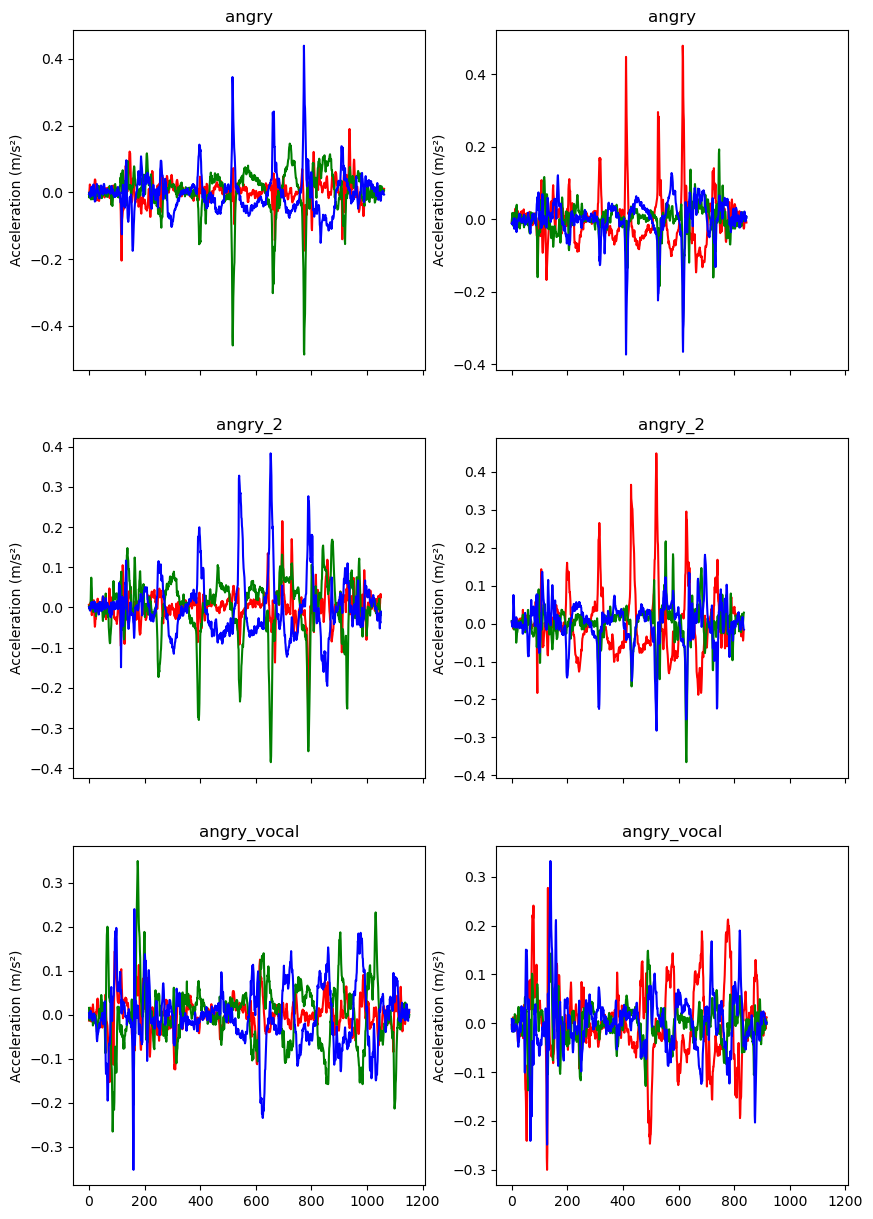

In [37]:
fig, axes = plt.subplots(len(DIRECTORIES), 2, figsize=(10, 15), sharex=True)

for idx, (foldername, folder) in enumerate(SENSOR_LOGS.items()):
  imu_data1 = folder["IMU1_GYRO_Log"]
  imu_data2 = folder["IMU2_GYRO_Log"]
  # time = imu_data[:, 0]
  time = np.arange(imu_data1.shape[0])
  accel_x = imu_data1[:, 1]
  accel_y = imu_data1[:, 2]
  accel_z = imu_data1[:, 3]
  axes[idx, 0].plot(time, accel_x, label='Accel X', color='r')
  axes[idx, 0].plot(time, accel_y, label='Accel Y', color='g')
  axes[idx, 0].plot(time, accel_z, label='Accel Z', color='b')
  axes[idx, 0].set_ylabel('Acceleration (m/s²)')
  axes[idx, 0].set_title(foldername)
  # axes[idx, 0].legend()

  time2 = np.arange(imu_data2.shape[0])
  accel_x = imu_data2[:, 1]
  accel_y = imu_data2[:, 2]
  accel_z = imu_data2[:, 3]
  axes[idx, 1].plot(time2, accel_x, label='Accel X', color='r')
  axes[idx, 1].plot(time2, accel_y, label='Accel Y', color='g')
  axes[idx, 1].plot(time2, accel_z, label='Accel Z', color='b')
  axes[idx, 1].set_ylabel('Acceleration (m/s²)')
  axes[idx, 1].set_title(foldername)
  # axes[idx, 1].legend()


# plt.xlabel('Time (s)')
plt.xlabel("Sample #")
plt.tight_layout()
plt.show()